# Root fit analyzing neural network


By Brady Lowe

lowebra2@isu.edu

7/25/2018


This Jupyter notebook was written to both develope and explain how we can use
neural networks to analyze the output of root fits to raw data.

### Load necessary packages

In [1]:
# Load some packages

# Keras packages for network
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, Conv2D, Flatten
from keras.models import Model
from keras.optimizers import Adam, SGD
# For saving model
from keras.models import model_from_json

# Some items for plotting and drawing
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from PIL import Image
from scipy import misc
import matplotlib.pyplot as plt

# Need numpy
import numpy as np
# Personal functions
import nn_utils

# Files for technical coding
import os

%matplotlib inline

Using TensorFlow backend.


### Load root fit data from file

In [6]:
# Load dataset with m examples (set m = -1 for all data)
m = -1
train_images, train_labels, train_filenames, test_images, test_labels, test_filenames = nn_utils.load_dataset(m, return_filenames=True)

# Grab number of images
m_train = train_images.shape[0]
m_test = test_images.shape[0]

# Grab dimensions of picture
h = train_images.shape[1]
w = train_images.shape[2]
c = train_images.shape[3]

# Print dimensions
print("(m_train, height, width, channels): (" + str(m_train) + ", " + str(h) + ", " + str(w) + ", " + str(c) + ")")
print("m_test: " + str(m_test))

train_images_conv = train_images.reshape(m_train, w, h, c)
test_images_conv = test_images.reshape(m_test, w, h, c)
input_shape = w, h, c
print("successfully reshaped data")


loading training images
loaded training images
(m_train, height, width, channels): (679, 236, 348, 3)
m_test: 85
successfully reshaped data


#### Take a look at the dataset

label: good
C:/Users/Lwin and Brady/Documents/machine learning/lab/images/train\fit_pmt_nn__run27_daq5_chi23_time20180726225702892_label1.png


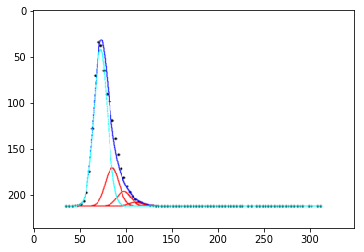

In [3]:
# Print an image
index = 420
this_image = train_images[index]
if train_labels[index] == 1:
    print("label: good")
else:
    print("label: bad")
print(train_filenames[index])
plt.imshow(np.uint8(nn_utils.get_printable_image(this_image)))

### Define model here

In [4]:
# Initialize
filters = []
kernels = []
strides = []
pools = []

# Conv1
filters.append(32)
kernels.append(7)
strides.append(2)
pools.append(2)

# Conv2
filters.append(160)
kernels.append(5)
strides.append(2)
pools.append(2)

# Conv3
filters.append(500)
kernels.append(3)
strides.append(2)
pools.append(2)

# Define dense (fully-connected) layer sizes
fc1 = 30
fc2 = 10

# Define input layer (RGB image matrix)
X = Input(shape=input_shape, name='Input')

# Initialize activation as input
a = X
# Loop through all convolutional layers
for i in range(len(filters)):
    # Perform convolution
    a = Conv2D(filters=filters[i], kernel_size=(kernels[i], kernels[i]), strides=(strides[i], strides[i]), name=('conv' + str(i)))(a)
    # Normalize
    a = BatchNormalization(axis=3, name=('bn' + str(i)))(a)
    # Activate
    a = Activation('relu', name=('a' + str(i)))(a)
    # Max-pool
    a = MaxPooling2D((2, 2), name=('max_pool' + str(i)))(a)

# Flatten output of convNet
a = Flatten()(a)
# Define first fully connected layer
a = Dense(units=fc1, activation='relu', name='fc0')(a)
# Use some dropout here for regularization
a = Dropout(rate=0.5)(a)
# Define second fully connected layer
a = Dense(units=fc2, activation='relu', name='fc1')(a)
# Define output layer 
a = Dense(units=1, activation='sigmoid', name='sigmoid')(a)

# Make the model
conv_model = Model(inputs=X, outputs=a)

# Print summary
conv_model.summary()

# Define optimizer
#opt = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.001)
opt = SGD(lr=1.0, decay=1e-6, momentum=0.9, nesterov=True)
# Define loss
loss = 'mean_squared_error'
# Define metrics to use
metrics=[]
metrics.append('accuracy')
# Compile model
conv_model.compile(loss=loss, optimizer='sgd', metrics=metrics)

successfully reshaped data
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 348, 236, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 171, 115, 32)      4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 171, 115, 32)      128       
_________________________________________________________________
a0 (Activation)              (None, 171, 115, 32)      0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 85, 57, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 41, 27, 160)       128160    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 41, 27, 160) 

#### Train model

In [5]:
# Now, fit the model to the data
conv_model.fit(train_images_conv, train_labels, epochs=200, batch_size=128)

Epoch 1/200
679/679 [==============================] - 10s 15ms/step - loss: 0.2820 - acc: 0.4860
Epoch 2/200
679/679 [==============================] - 6s 10ms/step - loss: 0.2569 - acc: 0.5405
Epoch 3/200
679/679 [==============================] - 6s 10ms/step - loss: 0.2492 - acc: 0.5552
Epoch 4/200
679/679 [==============================] - 6s 9ms/step - loss: 0.2378 - acc: 0.5582
Epoch 5/200
679/679 [==============================] - 6s 10ms/step - loss: 0.2284 - acc: 0.6141
Epoch 6/200
679/679 [==============================] - 6s 10ms/step - loss: 0.2312 - acc: 0.6230
Epoch 7/200
679/679 [==============================] - 6s 10ms/step - loss: 0.2242 - acc: 0.6082
Epoch 8/200
679/679 [==============================] - 6s 9ms/step - loss: 0.2107 - acc: 0.6672
Epoch 9/200
679/679 [==============================] - 6s 10ms/step - loss: 0.2054 - acc: 0.6922
Epoch 10/200
679/679 [==============================] - 6s 10ms/step - loss: 0.2046 - acc: 0.6701
Epoch 11/200
679/679 [========

679/679 [==============================] - 6s 9ms/step - loss: 0.0242 - acc: 0.9853
Epoch 85/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0262 - acc: 0.9853
Epoch 86/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0239 - acc: 0.9882
Epoch 87/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0231 - acc: 0.9809
Epoch 88/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0175 - acc: 0.9897
Epoch 89/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0239 - acc: 0.9838
Epoch 90/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0210 - acc: 0.9867
Epoch 91/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0206 - acc: 0.9867
Epoch 92/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0189 - acc: 0.9853
Epoch 93/200
679/679 [==============================] - 7s 10ms/step - loss: 0.0218 - acc: 0.9809
Epoch 94/200
679/679 [============

679/679 [==============================] - 6s 10ms/step - loss: 0.0090 - acc: 0.9985
Epoch 168/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0094 - acc: 0.9926
Epoch 169/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0086 - acc: 0.9912
Epoch 170/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0066 - acc: 0.9971
Epoch 171/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0094 - acc: 0.9912
Epoch 172/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0082 - acc: 0.9941
Epoch 173/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0071 - acc: 0.9971
Epoch 174/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0102 - acc: 0.9882
Epoch 175/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0104 - acc: 0.9897
Epoch 176/200
679/679 [==============================] - 6s 10ms/step - loss: 0.0068 - acc: 0.9971
Epoch 177/200
679/679 [=

#### Evaluate model

In [10]:
# Evaluate model, get metrics back
stats = conv_model.evaluate(x=test_images_conv, y=test_labels)
# Calculate predictions vector from model
predictions = conv_model.predict(x=test_images_conv)
predictions = np.floor(predictions + 0.5)

# Get vector mask for good and bad fits and right and wrong answers
good_fits = test_labels
bad_fits = 1 - good_fits
wrong_answers = np.abs(np.subtract(predictions, test_labels))
right_answers = np.subtract(1, wrong_answers)
# Calculate true positives (tp), as well as (tn) (fp) (fn)
true_positives = np.multiply(right_answers, good_fits)
true_negatives = np.multiply(right_answers, bad_fits)
false_positives = np.multiply(wrong_answers, good_fits)
false_negatives = np.multiply(wrong_answers, bad_fits)
# Calculate additional metrics
precision = np.sum(true_positives) / np.sum(true_positives + false_positives)
recall = np.sum(true_positives) / np.sum(true_positives + false_negatives)

# Print stats
print()
print("Performance on DEV set")
print("..........................")
print("Loss: " + str(stats[0]))
print("Accuracy: " + str(stats[1]))
print("Precision: " + str(precision))
print("Recall: " + str(recall))

# Print list of indices of wrong answers
bad_list = []
for i in range(m_test):
    if wrong_answers[i] == 1:
        bad_list.append(i)
print("..........................")
print("List of indices of wrong guesses:")
print(bad_list)

85/85 [==============================] - 2s 18ms/step

Performance on DEV set
..........................
Loss: 0.124124758384
Accuracy: 0.835294119751
Precision: 0.692307692308
Recall: 0.931034482759
..........................
List of indices of wrong guesses:
[7, 14, 18, 23, 31, 33, 35, 36, 44, 45, 48, 77, 81, 84]


#### Take a look at the predictions and mistakes being made

C:/Users/Lwin and Brady/Documents/machine learning/lab/images/dev\fit_pmt_nn__run84_daq5_chi0_time20180726223314394_label1.png
label: [1]
prediction: [ 0.]


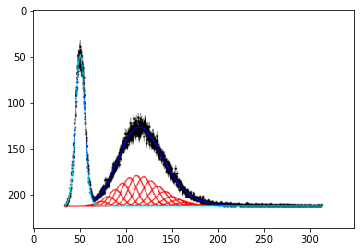

In [20]:
# Choose an index 
index = 84
# Print filename
print(test_filenames[index])
# Print labels for this index
print("label: " + str(good_fits[index]))
print("prediction: " + str(predictions[index]))

# Show image
this_image = test_images[index]
plt.imshow(np.uint8(nn_utils.get_printable_image(this_image)))

### Make changes to the dataset

#### Change the label of a training or testing image

In [18]:
# Change label of some file in dataset
index = 77
dataset = "testing"

# Set this to True to allow changes to be made
if False:
    # Grab info
    if dataset == "training":
        old_file = train_filenames[index]
        old_label = train_labels[index][0]
    elif dataset == "testing":
        old_file = test_filenames[index]
        old_label = test_labels[index][0]
        
    # Get rid of old label and .png extension
    new_file = old_file[0:len(old_file) - 5]
    # Append new label and .png
    new_label = 1 - old_label
    new_file += str(new_label) + ".png"
    # Change the filename
    os.rename(old_file, new_file)
    
    # Let the user know the dataset has changed 
    print("Training label changed for index " + str(index))
    print("You should now reload the dataset and recalculate the statistics")
else:
    print("Change flag above to True to execute changes to the dataset")

Change flag above to True to execute changes to the dataset


### Save Model

In [7]:
# serialize model to JSON
model_json = conv_model.to_json()
with open("dataset_interface_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
conv_model.save_weights("dataset_interface_model.h5")
print("Saved model to disk")

Saved model to disk


### Load Model

In [9]:
# load json and create model
json_file = open('dataset_interface_model.json', 'r')
conv_model_json = json_file.read()
json_file.close()
conv_model = model_from_json(conv_model_json)
# load weights into new model
conv_model.load_weights("dataset_interface_model.h5")
print("Loaded model from disk")

# Define loss
loss = 'mean_squared_error'
# Define metrics to use
metrics=[]
metrics.append('accuracy')
# Compile model
conv_model.compile(loss=loss, optimizer='sgd', metrics=metrics)
print("Model compiled")

Loaded model from disk
Model compiled
